In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
def z_normalize(x):
  m,n = x.shape
  mean = np.zeros(n)
  std = np.zeros(n)
  for i in range(n):
    mean[i] = np.mean(x[:,i])
    std[i] = np.std(x[:,i])
    x[:,i] = (x[:,i] - mean[i])/std[i]
  return x

In [3]:
def sigmoid(z):
  g_z = 1/(1+np.exp(-z))
  return g_z

In [4]:
def logistic_cost(x,y,w,b):
  m,n = x.shape
  cost = 0
  for i in range(m):
    cost += -y[i]*np.log(sigmoid(np.dot(x[i],w)+b)) - (1 - y[i])*np.log(1 - sigmoid(np.dot(x[i],w)+b))
  cost = cost/m
  return cost

In [5]:
def logistic_gradient(x,y,w,b):
  m,n = x.shape
  dj_dw = np.zeros((n,))
  dj_db = 0
  for i in range(m):
    dj_db += (sigmoid(np.dot(x[i],w)+b) - y[i])
    for j in range(n):
      dj_dw[j] += (sigmoid(np.dot(x[i],w)+b) - y[i])*x[i,j]
  dj_dw = dj_dw/m
  dj_db = dj_db/m
  return dj_dw,dj_db

In [6]:
def logistic_gardient_descent(x,y,w,b,alpha,num_itr,lambda_):
  m,n = x.shape
  cost_value = []
  for i in range(num_itr):
    dj_dw,dj_db = logistic_gradient(x,y,w,b)
    w = w*(1 - ((alpha*lambda_)/m))- alpha*dj_dw
    b = b - alpha*dj_db

    if i<100000:
      cost_value.append(logistic_cost(x,y,w,b))
    if i%math.ceil(num_itr/10)==0:
      print(f"Iteration {i:4}: Cost {cost_value[-1]:8.2f}")
  return w,b,cost_value

In [7]:
def binary_classification(x, y ):
  u ,v = x.shape
  w = np.zeros(v)
  b = 0
  alpha = float(input("give the value of alpha:"))
  num_itr = int(input("give the value of Iteration:"))
  lambda_ = float(input("give the value of lambda:"))
  w ,b ,cost_value = logistic_gardient_descent(x,y,w,b,alpha,num_itr,lambda_)
  print(w , b)
  fig, (ax) = plt.subplots()
  ax.plot(cost_value)
  ax.set_xlabel('iteration')
  ax.set_ylabel('cost')
  ax.set_title('cost vs Iteration')
  plt.show()
  return(w,b)

In [8]:
def binary_training_data(path):
  path = path.strip("'")
  df = pd.read_csv(path)

  u,v = df.shape
  v -= 2
  a_start = int(input("give the starting index of training data:"))
  a_end = int(input("give the ending index of training data:"))
  a = a_end - a_start
  x = np.zeros((a,v))
  y = np.zeros(a)

  df = df.iloc[a_start:a_end,:]
  x = df[df.columns[1:-1]].to_numpy()
  y = df[df.columns[-1]].to_numpy()
  x = z_normalize(x)

  return (x,y)

In [10]:
def binary_test_data(path):
  path = path.strip("'")
  df = pd.read_csv(path)

  u,v = df.shape
  v -= 1
  x = np.zeros((u,v))
  y = np.zeros(u)

  df = df.iloc[:,:]
  x = df[df.columns[1:]].to_numpy()
  x = z_normalize(x)

  return (x,y)

In [28]:
x_logistic_train , y_logistic_train = binary_training_data('/content/binary_classification_train.csv')

give the starting index of training data:0
give the ending index of training data:1000


In [29]:
x_test , y_test = binary_test_data('/content/binary_classification_test.csv')

In [30]:
x,y = binary_training_data('/content/binary_classification_train.csv')

give the starting index of training data:1000
give the ending index of training data:1200


give the value of alpha:0.1
give the value of Iteration:1000
give the value of lambda:1
Iteration    0: Cost     0.66
Iteration  100: Cost     0.28
Iteration  200: Cost     0.26
Iteration  300: Cost     0.25
Iteration  400: Cost     0.25
Iteration  500: Cost     0.25
Iteration  600: Cost     0.25
Iteration  700: Cost     0.25
Iteration  800: Cost     0.25
Iteration  900: Cost     0.25
[-0.00417489 -0.06453925 -0.02778455 -0.54100434 -0.05466152  1.58713404
  0.00332579  0.23209594  0.23080193  0.19300069  0.0130208  -0.25588057
 -0.03175295  0.26220509  0.6896115  -0.41220059  0.83602411 -0.54439524
 -0.27782174  0.07417323] -1.3340958898724287


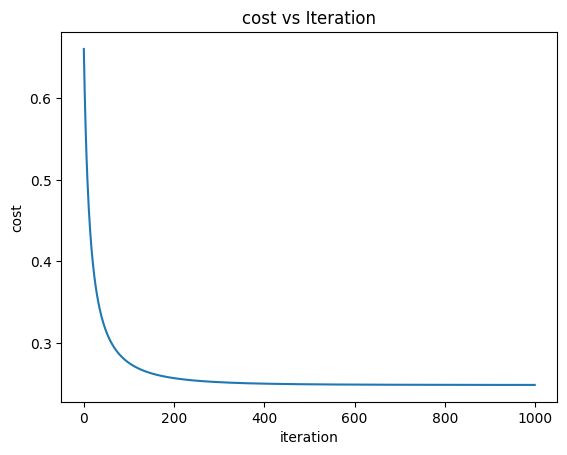

In [31]:
w_logistic ,b_logistic = binary_classification(x_logistic_train ,y_logistic_train)

In [32]:
y_hat = np.zeros(len(y))
y_hat = np.matmul(x,w_logistic)+b_logistic
for i in range(len(y)):
  if y_hat[i] >= 0.5:
    y_hat[i] = 1
  else:
    y_hat[i] = 0

In [33]:
def F1_score(x,y,w,b):
  tp = 0
  tn = 0
  fp = 0
  fn = 0
  for i in range(len(y)):
    if y[i] == y_hat[i] == 1:
      tp += 1
    elif y[i] == y_hat[i] == 0:
      tn += 1
    elif y[i] == 1 and y_hat[i] == 0:
      fn += 1
    else:
      fp += 1

  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  F1 = 2*precision*recall/(precision+recall)
  return F1

In [34]:
print(f"F1 score: {F1_score(x,y,w_logistic,b_logistic)}")

F1 score: 0.85


In [35]:
y_pred = np.dot(x_test,w_logistic)+b_logistic
w=0
for i in range(len(y_pred)):
  if y_pred[i] >= 0.5:
    y_pred[i] = 1
    w+=1
  else:
    y_pred[i] = 0

In [36]:
print(y_pred,w)

[0. 0. 0. ... 0. 1. 0.] 3184


In [37]:
np.savetxt('Binary classification test Result--.csv',y_pred,delimiter=',')